In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,f1_score,recall_score
%matplotlib inline

def eval_model(y_test,y_pred):
    result_dic={"Accuracy Score":round(accuracy_score(y_test,y_pred),2),
                "Precision_score":round(precision_score(y_test,y_pred),2),
                "recall_score":round(recall_score(y_test,y_pred),2),
                "f1_score": round(f1_score(y_test,y_pred),2)
               }
    return result_dic

def plot_conf_matrix(conf_matrix,color):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_matrix,annot=True,cbar=False,cmap=color)
    plt.xlabel("Predict Label")
    plt.ylabel("True Label")
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)

#collecting Data
original_data=pd.read_csv("../Datasets/Placement.csv")
original_data.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [94]:
#Dropping All NAN values in Salary column
samp_data=original_data.drop(['sl_no','salary'],axis=1)
samp_data.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [110]:
#Dividing data into x & Y
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x=samp_data.drop(['status'],axis=1)
y=samp_data['status']


#use of one-Hot-Encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']

one_hot=OneHotEncoder()

transformer=ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder="passthrough")

transformed_x=transformer.fit_transform(x)

transformed_y=pd.get_dummies(y,drop_first=True)
transformed_y=pd.Series(transformed_y['Placed'])

#Training and Testing
train_x,test_x,train_y,test_y=train_test_split(transformed_x,transformed_y,test_size=0.30,random_state=0)


{'Accuracy Score': 0.86, 'Precision_score': 0.88, 'recall_score': 0.93, 'f1_score': 0.91}


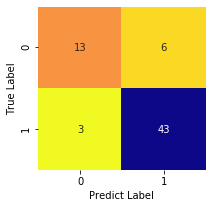

In [116]:
#LOGISTIC REGRESSION
lg_reg=LogisticRegression(solver="lbfgs",max_iter=1000)

#fitting & predicting
lg_reg.fit(train_x,train_y)
y_lg_preds = lg_reg.predict(test_x)

#evluating
lg_matrix=eval_model(test_y,y_lg_preds)
print(lg_matrix)

plot_conf_matrix(confusion_matrix(test_y,y_lg_preds),"plasma_r")

{'Accuracy Score': 0.82, 'Precision_score': 0.84, 'recall_score': 0.91, 'f1_score': 0.87}


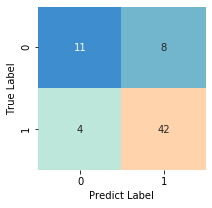

In [117]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=100,random_state=0)

rf_clf.fit(train_x,train_y)

y_rf_preds=rf_clf.predict(test_x)

rf_matrix=eval_model(test_y,y_rf_preds)

print(rf_matrix)
plot_conf_matrix(confusion_matrix(test_y,y_rf_preds),"icefire")

{'Accuracy Score': 0.86, 'Precision_score': 0.88, 'recall_score': 0.93, 'f1_score': 0.91}


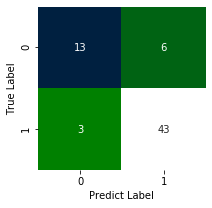

In [118]:
#SVM
from sklearn.svm import SVC

svm_clf=SVC(kernel='linear',random_state=0)

svm_clf.fit(train_x,train_y)

svm_y_preds=svm_clf.predict(test_x)

svm_matrix=eval_model(test_y,svm_y_preds)

print(svm_matrix)
plot_conf_matrix(confusion_matrix(test_y,svm_y_preds),"ocean")

{'Accuracy Score': 0.78, 'Precision_score': 0.82, 'recall_score': 0.89, 'f1_score': 0.85}


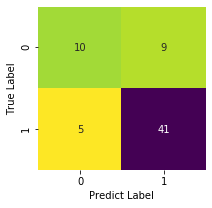

In [119]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier(random_state=0)

dt_clf.fit(train_x,train_y)

dt_y_preds = dt_clf.predict(test_x)

dt_matrix=eval_model(test_y,dt_y_preds)
print(dt_matrix)


plot_conf_matrix(confusion_matrix(test_y,dt_y_preds),"viridis_r")

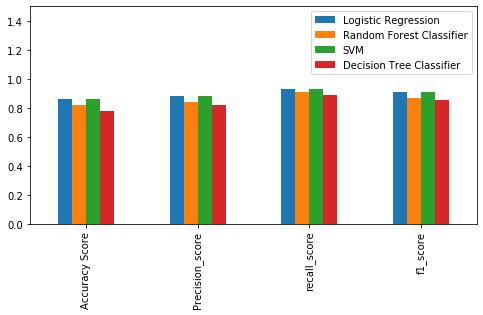

In [120]:
compare_matrices=pd.DataFrame({"Logistic Regression": lg_matrix,
                               "Random Forest Classifier":rf_matrix,
                               "SVM": svm_matrix,
                               "Decision Tree Classifier":dt_matrix})

compare_matrices.plot.bar(ylim=(0,1.5),figsize=(8,4))